# Read CSV to make diNT PWM used for looking up the scores

In [2]:
import csv

diNT_csv_dictionary = {}

#opens csv file, reads into a dictionary
with open('diNTpwm_fordict.csv') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        diNT_csv_dictionary[row['dinucleotide'], row['position']] = row['efficiency']

# diNT PWM score TIS

``  1 , 2,  3,  4,  5,  6,  7 ``

`` -6, -5, -4, -3, -2, -1, +4, +5 ``


In [3]:
#have to scan through each dinucleotide position in seq
#get the efficiency and multiply together
#save into table

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Bio import SeqIO

import operator
import functools

import math



Load sequences into differnet TIS lists, from #30_ATG_rest and transcribe to RNA

In [35]:
viral_TIS_list = []
#get the sequence out of the fasta file # should start at 24 until 35
for viral_seq_record in SeqIO.parse("viral_all_30up_toSTOP.fasta", "fasta"):
    #transcribes from DNA to RNA by replacing T with U
    viral_TIS_list.append(viral_seq_record.seq[24:35].transcribe())
    
    


# Scanning = []
# IRES = []
# LS = []
# NSP = []
# RS = []
# TR = []
# VPG = []
# UNKNOWN = []
    

SCANNING_VIRAL_TIS_LIST = []
#get the sequence out of the fasta file # should start at 24 until 35
for viral_seq_record in SeqIO.parse("SCANNING_viral_all_30up_toSTOP_SEP.fasta", "fasta"):
    #transcribes from DNA to RNA by replacing T with U
    SCANNING_VIRAL_TIS_LIST.append(viral_seq_record.seq[24:35].transcribe())
    
IRES_VIRAL_TIS_LIST = []
#get the sequence out of the fasta file # should start at 24 until 35
for viral_seq_record in SeqIO.parse("IRES_viral_all_30up_toSTOP_SEP.fasta", "fasta"):
    #transcribes from DNA to RNA by replacing T with U
    IRES_VIRAL_TIS_LIST.append(viral_seq_record.seq[24:35].transcribe())
    
LEAKY_VIRAL_TIS_LIST = []
#get the sequence out of the fasta file # should start at 24 until 35
for viral_seq_record in SeqIO.parse("LEAKY_viral_all_30up_toSTOP_SEP.fasta", "fasta"):
    #transcribes from DNA to RNA by replacing T with U
    LEAKY_VIRAL_TIS_LIST.append(viral_seq_record.seq[24:35].transcribe())
    
NSP_VIRAL_TIS_LIST = []
#get the sequence out of the fasta file # should start at 24 until 35
for viral_seq_record in SeqIO.parse("NSP_viral_all_30up_toSTOP_SEP.fasta", "fasta"):
    #transcribes from DNA to RNA by replacing T with U
    NSP_VIRAL_TIS_LIST.append(viral_seq_record.seq[24:35].transcribe())
    
RIBOSOMESHUNTING_TIS_LIST = []
#get the sequence out of the fasta file # should start at 24 until 35
for viral_seq_record in SeqIO.parse("RIBOSOMESHUNTING_viral_all_30up_toSTOP_SEP.fasta", "fasta"):
    #transcribes from DNA to RNA by replacing T with U
    RIBOSOMESHUNTING_TIS_LIST.append(viral_seq_record.seq[24:35].transcribe())
    
    
    
TERMINATIONINITIATION_TIS_LIST = []
#get the sequence out of the fasta file # should start at 24 until 35
for viral_seq_record in SeqIO.parse("TERMINATIONREINITIATION_viral_all_30up_toSTOP_SEP.fasta", "fasta"):
    #transcribes from DNA to RNA by replacing T with U
    TERMINATIONINITIATION_TIS_LIST.append(viral_seq_record.seq[24:35].transcribe())
    
    
    
VPG_TIS_LIST = []
#get the sequence out of the fasta file # should start at 24 until 35
for viral_seq_record in SeqIO.parse("VPG_viral_all_30up_toSTOP_SEP.fasta", "fasta"):
    #transcribes from DNA to RNA by replacing T with U
    VPG_TIS_LIST.append(viral_seq_record.seq[24:35].transcribe())
    
    
    
    
UNKNOWN_TIS_LIST = []
#get the sequence out of the fasta file # should start at 24 until 35
for viral_seq_record in SeqIO.parse("UNKNOWN_viral_all_30up_toSTOP_SEP.fasta", "fasta"):
    #transcribes from DNA to RNA by replacing T with U
    UNKNOWN_TIS_LIST.append(viral_seq_record.seq[24:35].transcribe())
    
    
    
    
    
    
    
    
    
    
    
human_TIS_list = []
for human_seq_record in SeqIO.parse("hs_all_nodup_u36.fasta", "fasta"):
    human_TIS_list.append(human_seq_record.seq.upper()[30:41].transcribe())
    
    
    
        
gemini_TIS_list = []
for gemini_seq_record in SeqIO.parse("YA_diNT_replace_C_gemini_5utr_orf.fasta", "fasta"):
    gemini_TIS_list.append(gemini_seq_record.seq.upper()[29:40].transcribe())  

In [7]:
# above TIS_lists will be the input of below function

# extract diNT from TIS_list and discard common AUG

In [5]:
def diNT_tuple_gen(TIS_list):
    
    # MAKES A LIST OF DINT TUPLES FOR EACH TIS DISCARDING THE AUG - saves the diNT and its position
    seq_dint_tuple_list = []
    
    for i in range(len(TIS_list)):

        for j in range(0,5):
            seq_dint_tuple_list.append((str(TIS_list[i][j:j+2]), j+1))

        # add dint position 6
        seq_dint_tuple_list.append((TIS_list[i][5]+TIS_list[i][9], 6))


        # add dint position 7
        seq_dint_tuple_list.append((TIS_list[i][9]+TIS_list[i][10], 7))
    
    return seq_dint_tuple_list

# TESTING CODE to remove YA diNT

In [6]:
# have to remove YA diNT
def diNT_tuple_gen_test(TIS_list):
    
    # MAKES A LIST OF DINT TUPLES FOR EACH TIS DISCARDING THE AUG - saves the diNT and its position
    seq_dint_tuple_list = []
    
    for i in range(len(TIS_list)):

        for j in range(0,5):
            seq_dint_tuple_list.append((str(TIS_list[i][j:j+2]), j+1))

        # add dint position 6
        seq_dint_tuple_list.append((TIS_list[i][5]+TIS_list[i][9], 6))

        
        # add dint position 7
        seq_dint_tuple_list.append((TIS_list[i][9]+TIS_list[i][10], 7))
    
    return seq_dint_tuple_list

In [18]:
test_list = diNT_tuple_gen_test(gemini_TIS_list)

"YA" in test_list

test_list[0:2]


[('YA', 1) for ]

[('UA', 1), ('AU', 2)]

# TESTING CODE to remove YA diNT


# define PWM score lookup function

In [7]:
def PWM(dinucleotide, position):
    #convert efficiency into float
    return float(diNT_csv_dictionary[dinucleotide, position])

In [8]:
#first index is 0 to 6
#2nd index is from 0 to 1

#have to accumulate every 7 PWMs

def score_seq_with_PWM(seq_dint_tuple_list):
    
    PWM_diNT_scores_seq = []
    
    #loop through all the tuples in the dint tuple list
    for i in range(len(seq_dint_tuple_list)):
        
        #score each diNT, save the position and store into another list PWM_diNT_scores_seq
        PWM_diNT_scores_seq.append(PWM(seq_dint_tuple_list[i][0], str(seq_dint_tuple_list[i][1])))


    #group every 7 tuples which is a single sequence
    list_of_tuples_by_seven = [PWM_diNT_scores_seq[x:x+7] for x in range(0, len(PWM_diNT_scores_seq),7)]


    # have to multiply every 7 indices together to get single PWM score per sequence
    PWM_scores_seq = []
    for i in range(len(list_of_tuples_by_seven)):
        PWM_scores_seq.append(functools.reduce(operator.mul, list_of_tuples_by_seven[i], 7))
    
    return PWM_scores_seq


In [9]:
def convert_to_Pandas_series_adjust_K_val(PWM_scores_seq):
    #convert to pandas series, a datastructure, to easily manipulate
    pandas_PWM_scores = pd.Series(PWM_scores_seq)
    adjusted_PWM_scores = pandas_PWM_scores*math.exp(4.602730)
    
    return adjusted_PWM_scores

# Plotting functions

In [ ]:
plt.hist(adjusted_PWM_scores, bins = 200)
plt.show()

# diNT PWM scoring pipeline

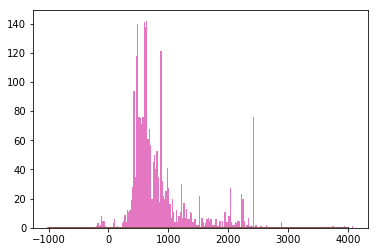

In [36]:
viral_diNT_tuples = diNT_tuple_gen(viral_TIS_list)
not_adjusted_viral_PWM_scores = score_seq_with_PWM(viral_diNT_tuples)
viral_data = convert_to_Pandas_series_adjust_K_val(not_adjusted_viral_PWM_scores)


s_v_t_l = diNT_tuple_gen(SCANNING_VIRAL_TIS_LIST)
not_adjusted_s_v_t_l = score_seq_with_PWM(s_v_t_l)
scanning_viral_data = convert_to_Pandas_series_adjust_K_val(not_adjusted_s_v_t_l)

ivtl = diNT_tuple_gen(IRES_VIRAL_TIS_LIST)
not_adjusted_ivtl = score_seq_with_PWM(ivtl)
ires_viral_data = convert_to_Pandas_series_adjust_K_val(not_adjusted_ivtl)

lvtl = diNT_tuple_gen(LEAKY_VIRAL_TIS_LIST)
not_adjusted_lvtl = score_seq_with_PWM(lvtl)
leaky_viral_data = convert_to_Pandas_series_adjust_K_val(not_adjusted_lvtl)

nsvtl = diNT_tuple_gen(NSP_VIRAL_TIS_LIST)
not_adjusted_nsvtl = score_seq_with_PWM(nsvtl)
nsp_viral_data = convert_to_Pandas_series_adjust_K_val(not_adjusted_nsvtl)


rstl = diNT_tuple_gen(RIBOSOMESHUNTING_TIS_LIST)
not_adjusted_rstl = score_seq_with_PWM(rstl)
rs_viral_data = convert_to_Pandas_series_adjust_K_val(not_adjusted_rstl)


titl = diNT_tuple_gen(TERMINATIONINITIATION_TIS_LIST)
not_adjusted_titl = score_seq_with_PWM(titl)
ti_viral_data = convert_to_Pandas_series_adjust_K_val(not_adjusted_titl)



vpgtl = diNT_tuple_gen(VPG_TIS_LIST)
not_adjusted_vpgtl = score_seq_with_PWM(vpgtl)
vpg_viral_data = convert_to_Pandas_series_adjust_K_val(not_adjusted_vpgtl)


unknowntl = diNT_tuple_gen(UNKNOWN_TIS_LIST)
not_adjusted_unknowntl = score_seq_with_PWM(unknowntl)
unknown_viral_data = convert_to_Pandas_series_adjust_K_val(not_adjusted_unknowntl)
    


human_diNT_tuples = diNT_tuple_gen(human_TIS_list)
not_adjusted_human_PWM_scores = score_seq_with_PWM(human_diNT_tuples)
human_data = convert_to_Pandas_series_adjust_K_val(not_adjusted_human_PWM_scores)


scram_human_TIS                      = scramble_TIS(human_TIS_list)

scram_SCANNING_VIRAL_TIS_LIST        = scramble_TIS(SCANNING_VIRAL_TIS_LIST)
scram_IRES_VIRAL_TIS_LIST            = scramble_TIS(IRES_VIRAL_TIS_LIST)
scarm_LEAKY_VIRAL_TIS_LIST           = scramble_TIS(LEAKY_VIRAL_TIS_LIST)
scram_NSP_VIRAL_TIS_LIST             = scramble_TIS(NSP_VIRAL_TIS_LIST)
scram_RIBOSOMESHUNTING_TIS_LIST      = scramble_TIS(RIBOSOMESHUNTING_TIS_LIST)
scram_TERMINATIONINITIATION_TIS_LIST = scramble_TIS(TERMINATIONINITIATION_TIS_LIST)
scram_VPG_TIS_LIST                   = scramble_TIS(VPG_TIS_LIST)
scram_UNKNOWN_TIS_LIST               = scramble_TIS(UNKNOWN_TIS_LIST)




scram_human_TIS_diNT_tuple = diNT_tuple_gen(scram_human_TIS)
no_adjust_scram_human_TIS = score_seq_with_PWM(scram_human_TIS_diNT_tuple)
scram_human_data = convert_to_Pandas_series_adjust_K_val(no_adjust_scram_human_TIS)




scram_SCANNING_VIRAL_TIS_LIST_diNT_tuple = diNT_tuple_gen(scram_SCANNING_VIRAL_TIS_LIST)
no_adjust_SCANNING_VIRAL_TIS = score_seq_with_PWM(scram_SCANNING_VIRAL_TIS_LIST_diNT_tuple)
scram_SCANNING_data = convert_to_Pandas_series_adjust_K_val(no_adjust_SCANNING_VIRAL_TIS)

scram_IRES_VIRAL_TIS_LIST_diNT_tuple = diNT_tuple_gen(scram_IRES_VIRAL_TIS_LIST)
no_adjust_IRES_VIRAL_TIS = score_seq_with_PWM(scram_IRES_VIRAL_TIS_LIST_diNT_tuple)
scram_IRES_data = convert_to_Pandas_series_adjust_K_val(no_adjust_IRES_VIRAL_TIS)

scarm_LEAKY_VIRAL_TIS_LIST_diNT_tuple = diNT_tuple_gen(scarm_LEAKY_VIRAL_TIS_LIST)
no_adjust_LEAKY_VIRA_TIS = score_seq_with_PWM(scarm_LEAKY_VIRAL_TIS_LIST_diNT_tuple)
scram_LEAKY_data = convert_to_Pandas_series_adjust_K_val(no_adjust_LEAKY_VIRA_TIS)

scram_NSP_VIRAL_TIS_LIST_diNT_tuple = diNT_tuple_gen(scram_NSP_VIRAL_TIS_LIST)
no_adjust_NSP_VIRAL_TIS = score_seq_with_PWM(scram_NSP_VIRAL_TIS_LIST_diNT_tuple)
scram_NSP_data = convert_to_Pandas_series_adjust_K_val(no_adjust_NSP_VIRAL_TIS)

scram_RIBOSOMESHUNTING_TIS_LIST_diNT_tuple = diNT_tuple_gen(scram_RIBOSOMESHUNTING_TIS_LIST)
no_adjust_RIBOSOMESHUNTING_TIS_TIS = score_seq_with_PWM(scram_RIBOSOMESHUNTING_TIS_LIST_diNT_tuple)
scram_RS_data = convert_to_Pandas_series_adjust_K_val(no_adjust_RIBOSOMESHUNTING_TIS_TIS)

scram_TERMINATIONINITIATION_TIS_LIST_diNT_tuple = diNT_tuple_gen(scram_TERMINATIONINITIATION_TIS_LIST)
no_adjust_TERMINATIONINITIATION_TIS = score_seq_with_PWM(scram_TERMINATIONINITIATION_TIS_LIST_diNT_tuple)
scram_TI_data = convert_to_Pandas_series_adjust_K_val(no_adjust_TERMINATIONINITIATION_TIS)

scram_VPG_TIS_LIST_diNT_tuple = diNT_tuple_gen(scram_VPG_TIS_LIST)
no_adjust_scram_VPG_TIS = score_seq_with_PWM(scram_VPG_TIS_LIST_diNT_tuple)
scram_VPG_data = convert_to_Pandas_series_adjust_K_val(no_adjust_scram_VPG_TIS)

scram_UNKNOWN_TIS_LIST_diNT_tuple = diNT_tuple_gen(scram_UNKNOWN_TIS_LIST)
no_adjust_scram_UNKNOWN_TIS = score_seq_with_PWM(scram_UNKNOWN_TIS_LIST_diNT_tuple)
scram_UNKNOWN_data = convert_to_Pandas_series_adjust_K_val(no_adjust_scram_UNKNOWN_TIS)



gemini_diNT_tuples = diNT_tuple_gen(gemini_TIS_list)
not_adjusted_gemini_PWM_scores = score_seq_with_PWM(gemini_diNT_tuples) 
#messed up diNT "YA"  so just skip the YA diNT
gemini_data = convert_to_Pandas_series_adjust_K_val(not_adjusted_gemini_PWM_scores)






# plt.hist(viral_data,bins = 200)
# plt.hist(human_data, bins = 200)

# plt.hist(scrambled_human_data,bins=200)

plt.hist(gemini_data,bins=200)



plt.show()

In [70]:
SCANNING_VIRAL_TIS_LIST


# scanning_viral_data
# ires_viral_data
# leaky_viral_data
# nsp_viral_data
# rs_viral_data
# ti_viral_data
# vpg_viral_data
# unknown_viral_data


[Seq('GCCGCCAUGCC', RNAAlphabet()),
 Seq('GCCGCCAUGCC', RNAAlphabet()),
 Seq('AGGUACAUGGA', RNAAlphabet()),
 Seq('AGGUACAUGGA', RNAAlphabet()),
 Seq('UCAGGUAUGGC', RNAAlphabet()),
 Seq('GUUAAGACGGC', RNAAlphabet()),
 Seq('GUCAGACUGGA', RNAAlphabet()),
 Seq('AAUACGAUGGC', RNAAlphabet()),
 Seq('AGCAGUAUGGU', RNAAlphabet()),
 Seq('GCGCCCAUGGG', RNAAlphabet()),
 Seq('GCGACCAUGCG', RNAAlphabet()),
 Seq('UAGGCAAUGGG', RNAAlphabet()),
 Seq('UAGGCAAUGGG', RNAAlphabet()),
 Seq('UAGGCAAUGGG', RNAAlphabet()),
 Seq('AGCUGCAUGCC', RNAAlphabet()),
 Seq('AACACCAUGGG', RNAAlphabet()),
 Seq('AACACCAUGGG', RNAAlphabet()),
 Seq('CCCAAAAUGGA', RNAAlphabet()),
 Seq('GCCAAGAUGUU', RNAAlphabet()),
 Seq('GCCAAGAUGUU', RNAAlphabet()),
 Seq('AAGGCCAUGGU', RNAAlphabet()),
 Seq('AGGUUCAUGGG', RNAAlphabet()),
 Seq('UCAGGCAUGGC', RNAAlphabet()),
 Seq('AUGAAGAUGGC', RNAAlphabet()),
 Seq('GAAUCCAUGGA', RNAAlphabet()),
 Seq('GAAUCCAUGGA', RNAAlphabet()),
 Seq('GUAAACAUGAA', RNAAlphabet()),
 Seq('GUAAACAUGAA', RNAAlpha

# Randomize human TIS sequence

In [11]:
import numpy
import random
from Bio.SeqRecord import SeqRecord
from Bio.Seq import Seq
from Bio.Alphabet import generic_rna

#for human sequences make a new fresh list of TIS sequences
from Bio import SeqIO
rand_TIS_list = []
#get the sequence out of the fasta file # should start at 24 until 35
for rand_seq_record in SeqIO.parse("hs_all_nodup_u36.fasta", "fasta"):
    #transcribes from DNA to RNA by replacing T with U
    rand_TIS_list.append(rand_seq_record.seq.upper()[30:41].transcribe())

In [47]:
def scramble_TIS(rand_TIS_list):
    #rerun to get more random seq
    shuffled_TIS_list =[]

    for each in rand_TIS_list:

        #get the TIS only
        TIS_only = str(each[0:6] + each[9:11])

        #shuffles the TIS string
        shuffled_TIS_source_string = ''.join(random.sample(TIS_only,len(TIS_only)))

        shuffled_record = Seq(shuffled_TIS_source_string[0:6] + "AUG" + shuffled_TIS_source_string[6:8], 
                generic_rna)
        shuffled_TIS_list.append(shuffled_record)
    return shuffled_TIS_list
    

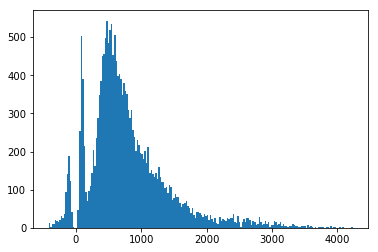

In [12]:
# #rerun to get more random seq
# shuffled_TIS_list =[]

# for each in rand_TIS_list:
    
#     #get the TIS only
#     TIS_only = str(each[0:6] + each[9:11])
    
#     #shuffles the TIS string
#     shuffled_TIS_source_string = ''.join(random.sample(TIS_only,len(TIS_only)))
    
#     shuffled_record = Seq(shuffled_TIS_source_string[0:6] + "AUG" + shuffled_TIS_source_string[6:8], 
#             generic_rna)
#     shuffled_TIS_list.append(shuffled_record)
    
    
    

    
scrambled_diNT_tuple_list = diNT_tuple_gen(shuffled_TIS_list)

scrambled_PWM_scores = score_seq_with_PWM(scrambled_diNT_tuple_list)

scrambled_human_data = convert_to_Pandas_series_adjust_K_val(scrambled_PWM_scores)

plt.hist(scrambled_human_data,bins=200)
plt.show()
    
# seq_dint_tuple_list = []
# for i in range(len(shuffled_TIS_list)):

#     for j in range(0,5):
#         seq_dint_tuple_list.append((str(shuffled_TIS_list[i][j:j+2]), j+1))

#     # add dint position 6
#     seq_dint_tuple_list.append((shuffled_TIS_list[i][5]+TIS_list[i][9], 6))


#     # add dint position 7
#     seq_dint_tuple_list.append((shuffled_TIS_list[i][9]+TIS_list[i][10], 7))
    

    
    #first index is 0 to 6
#2nd index is from 0 to 1

#have to accumulate every 7 PWMs

# PWM_diNT_scores_seq = []
# for i in range(len(seq_dint_tuple_list)):
#     PWM_diNT_scores_seq.append(PWM(seq_dint_tuple_list[i][0], str(seq_dint_tuple_list[i][1])))
    
# list_of_tuples_by_seven = [PWM_diNT_scores_seq[x:x+7] for x in range(0, len(PWM_diNT_scores_seq),7)]


# # have to multiply every 7 indices
    
# import operator
# import functools

# PWM_scores_seq = []
# for i in range(len(list_of_tuples_by_seven)):
#     PWM_scores_seq.append(functools.reduce(operator.mul, list_of_tuples_by_seven[i], 7))


^above result always has a characterisit peak at 0-1

# Plot density of diNT PWM scores

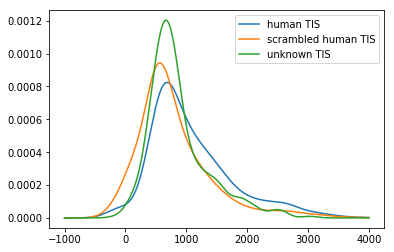

In [45]:
#plots densities of the efficiencies

import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde

xs = np.linspace(-1000,4000,2000)


# plt.hist(viral_data,bins = 200)
# plt.hist(human_data, bins = 200)
# plt.hist(scrambled_human_data,bins=200)


# density_viral = gaussian_kde(viral_data)
# density_viral.covariance_factor = lambda : .25
# density_viral._compute_covariance()
# plt.plot(xs,density_viral(xs), label = "viral TIS")



density_human = gaussian_kde(human_data)
density_human.covariance_factor = lambda : .25
density_human._compute_covariance()
plt.plot(xs,density_human(xs), label = "human TIS")



density_scrambled_human = gaussian_kde(scrambled_human_data)
density_scrambled_human.covariance_factor = lambda : .25
density_scrambled_human._compute_covariance()
plt.plot(xs,density_scrambled_human(xs),label = "scrambled human TIS")



# density_gemini = gaussian_kde(gemini_data)
# density_gemini.covariance_factor = lambda : .25
# density_gemini._compute_covariance()
# plt.plot(xs,density_gemini(xs),label = "gemini TIS")





# scanning_viral_data
# ires_viral_data
# leaky_viral_data
# nsp_viral_data
# rs_viral_data
# ti_viral_data
# vpg_viral_data
# unknown_viral_data




# density_s = gaussian_kde(scanning_viral_data)
# density_s.covariance_factor = lambda : .25
# density_s._compute_covariance()
# plt.plot(xs,density_s(xs),label = "scanning viral TIS")


# density_i = gaussian_kde(ires_viral_data)
# density_i.covariance_factor = lambda : .25
# density_i._compute_covariance()
# plt.plot(xs,density_i(xs),label = "ires viral TIS")

# density_l = gaussian_kde(leaky_viral_data)
# density_l.covariance_factor = lambda : .25
# density_l._compute_covariance()
# plt.plot(xs,density_l(xs),label = "leaky viral TIS")

# density_n = gaussian_kde(nsp_viral_data)
# density_n.covariance_factor = lambda : .25
# density_n._compute_covariance()
# plt.plot(xs,density_n(xs),label = "nsp viral TIS")

# density_rs = gaussian_kde(rs_viral_data)
# density_rs.covariance_factor = lambda : .25
# density_rs._compute_covariance()
# plt.plot(xs,density_rs(xs),label = "ribosome shunting viral TIS")

# density_ti = gaussian_kde(ti_viral_data)
# density_ti.covariance_factor = lambda : .25
# density_ti._compute_covariance()
# plt.plot(xs,density_ti(xs),label = "termination reinitiation viral TIS")

# density_v = gaussian_kde(vpg_viral_data)
# density_v.covariance_factor = lambda : .25
# density_v._compute_covariance()
# plt.plot(xs,density_v(xs),label = "vpg viral TIS")

density_uk = gaussian_kde(unknown_viral_data)
density_uk.covariance_factor = lambda : .25
density_uk._compute_covariance()
plt.plot(xs,density_uk(xs),label = "unknown TIS")




plt.legend()
plt.show()

#human

# Chi Square test

In [46]:
from scipy import stats

# stats.chisquare()

human_data.to_csv("human_pwm_scores.csv")
# viral_data.to_csv("viral_pwm_scores.csv")
scrambled_human_data.to_csv("scrambled_human_pwm_scores.csv")




scanning_viral_data.to_csv("scanning_viral_pwm_scores.csv")
ires_viral_data.to_csv("ires_viral_pwm_scores")
leaky_viral_data.to_csv("leaky_viral_pwm_scores")
nsp_viral_data.to_csv("nsp_viral_pwm_scores")
rs_viral_data.to_csv("rs_viral_pwm_scores")
ti_viral_data.to_csv("ti_viral_pwm_scores")
vpg_viral_data.to_csv("vpg_viral_pwm_scores")
unknown_viral_data.to_csv("unknown_viral_pwm_scores")










gemini_data.to_csv("gemini_pwm_scores.csv")


# observed = np.array(human_data)
# expected = np.array(scrambled_human_data)





In [ ]:
stats.chisquare(human_data, scrambled_human_data)

# use the new scoring scheme to scan the entire ORF like what you did in last semester.

In [25]:
# have to scan the TIS + 200 bp downstream


